In [1]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns',10)
pd.set_option('display.max_colwidth',20)

titanic=sns.load_dataset('titanic')
df=titanic.loc[:,['age','sex','class','fare','survived']]
print(df.head())
print('\n')

pdf1=pd.pivot_table(df,index='class',columns='sex',values='age',aggfunc='mean')

print(pdf1.head())

pdf2=pd.pivot_table(df,index='class',columns='sex',values='age',
                    aggfunc=['mean','sum'])

print(pdf2.head())

pdf3=pd.pivot_table(df,index=['class','sex'],columns='survived',
                    values=['age','fare'],aggfunc=['mean','sum'])

pd.set_option('display.max_columns',10)
print(pdf3.head())
print('\n')

print(pdf3.index)
print(pdf3.columns)

print(pdf3.xs('First'))
print(pdf3.xs(('First','female')))
print(pdf3.xs('male',level='sex'))
print(pdf3.xs(('Second','male'),level=[0,'sex']))

print(pdf3.xs('mean',axis=1))
print(pdf3.xs(('mean','age'),axis=1))
print(pdf3.xs(1,level='survived',axis=1))

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589
             mean                sum         
sex        female       male  female     male
class                                        
First   34.611765  41.281386  2942.0  4169.42
Second  28.722973  30.740707  2125.5  3043.33
Third   21.750000  26.507589  2218.5  6706.42
                    mean                                        sum           \
                     age                   fare                 age            
survived               0          1           0           1       0        1   
class  sex                                                                     
First

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                 name  
0       1  chevrolet chevel...  
1       1    buick skylark 320  
2       1   plymouth satellite  
3       1        amc rebel sst  
4       1          ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0     

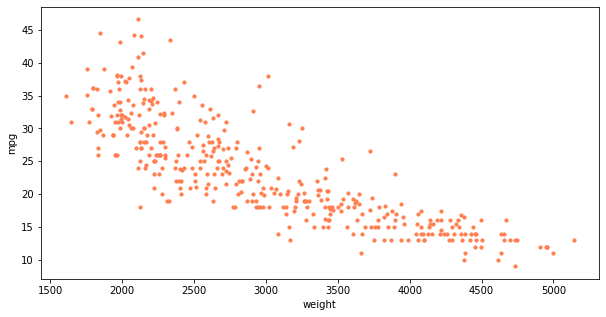

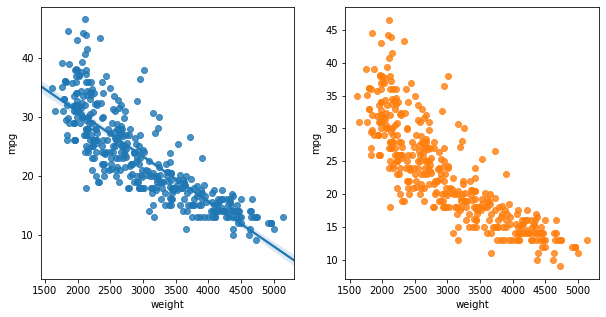

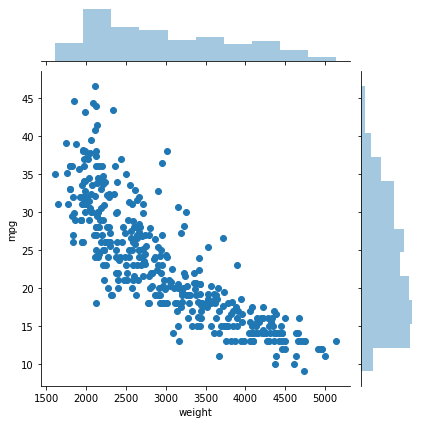

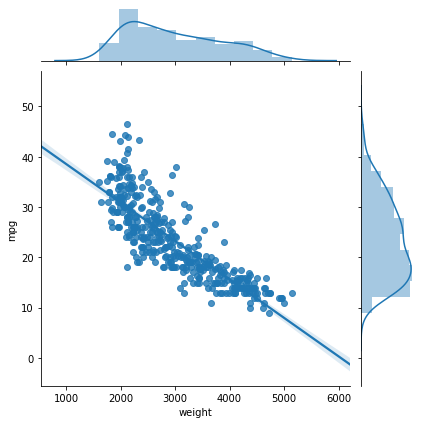

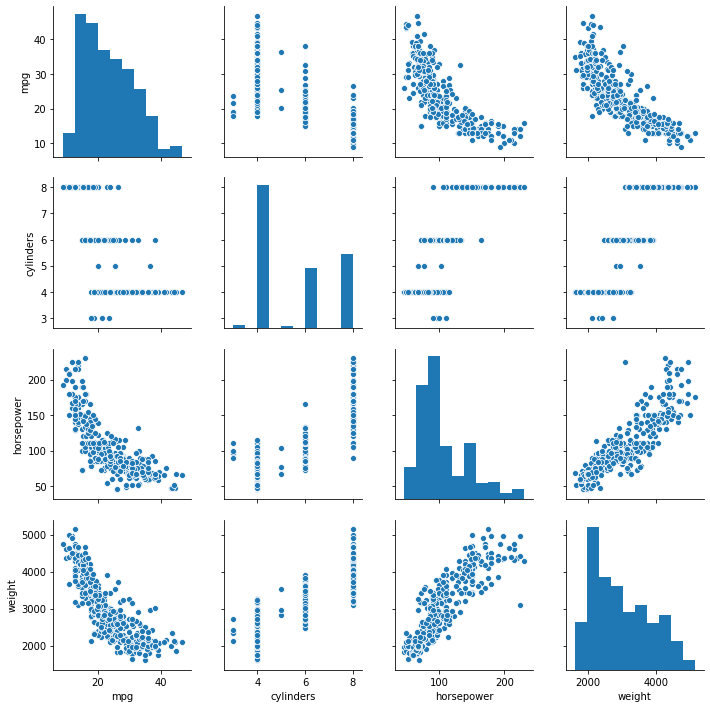

train data 개수: 274
test data 개수: 118
0.6822458558299325
기울기 a: [-0.00775343]


y절편 b 46.710366257280086


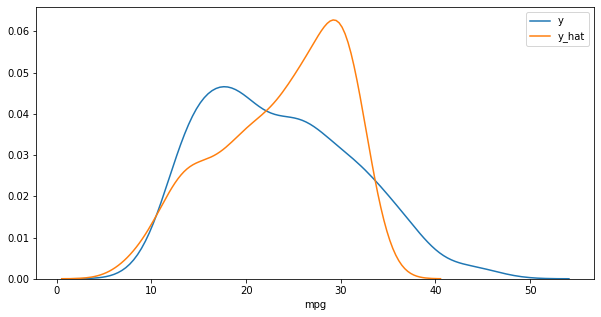

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('./auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model year','origin','name']

print(df.head())
print('\n')

pd.set_option('display.max_columns',10)
print(df.head())

print(df.info())
print('\n')

print(df.describe())

print(df['horsepower'].unique())
print('\n')

df['horsepower'].replace('?',np.nan,inplace=True)
df.dropna(subset=['horsepower'],axis=0,inplace=True)
df['horsepower']=df['horsepower'].astype('float')

print(df.describe())

ndf=df[['mpg','cylinders','horsepower','weight']]
print(ndf.head())

ndf.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5))
plt.show()
plt.close()

fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax1)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax2,fit_reg=False)
plt.show()
plt.close()

sns.jointplot(x='weight',y='mpg',data=ndf)
sns.jointplot(x='weight',y='mpg',kind='reg',data=ndf)
plt.show()
plt.close()

grid_ndf=sns.pairplot(ndf)
plt.show()
plt.close()

x=ndf[['weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=0.3,random_state=10)

print('train data 개수:',len(x_train))
print('test data 개수:',len(x_test))

from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

r_square=lr.score(x_test,y_test)
print(r_square)

print('기울기 a:',lr.coef_)
print('\n')

print('y절편 b',lr.intercept_)

y_hat=lr.predict(x)

plt.figure(figsize=(10,5))
ax1=sns.distplot(y,hist=False,label="y")
ax2=sns.distplot(y_hat,hist=False,label="y_hat",ax=ax1)
plt.show()
plt.close()

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)
원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)
0.7087009262975685


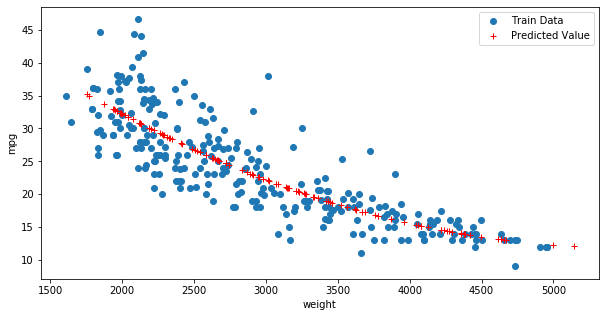

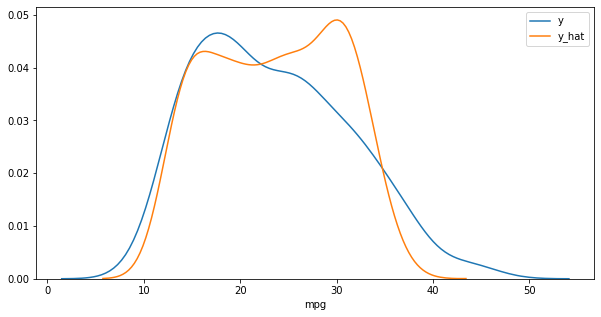

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('./auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model year','origin','name']

df['horsepower'].replace('?',np.nan,inplace=True)
df.dropna(subset=['horsepower'],axis=0,inplace=True)
df['horsepower']=df['horsepower'].astype('float')

ndf=df[['mpg','cylinders','horsepower','weight']]

x=ndf[['weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=0.3,random_state=10)

print('훈련 데이터: ',x_train.shape)
print('검증 데이터: ',x_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)

print('원 데이터: ',x_train.shape)
print('2차항 변환 데이터: ',x_train_poly.shape)

pr=LinearRegression()
pr.fit(x_train_poly,y_train)

x_test_poly=poly.fit_transform(x_test)
r_square=pr.score(x_test_poly,y_test)
print(r_square)

y_hat_test=pr.predict(x_test_poly)

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(x_train,y_train,'o',label='Train Data')
ax.plot(x_test,y_hat_test,'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

x_ploy=poly.fit_transform(x)
y_hat=pr.predict(x_ploy)

plt.figure(figsize=(10,5))
ax1=sns.distplot(y,hist=False,label="y")
ax2=sns.distplot(y_hat,hist=False,label="y_hat",ax=ax1)
plt.show()
plt.close()

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)
0.6939048496695597


x 변수의 개수 a:  [-0.60691288 -0.03714088 -0.00522268]


상수항 b 46.41435126963408


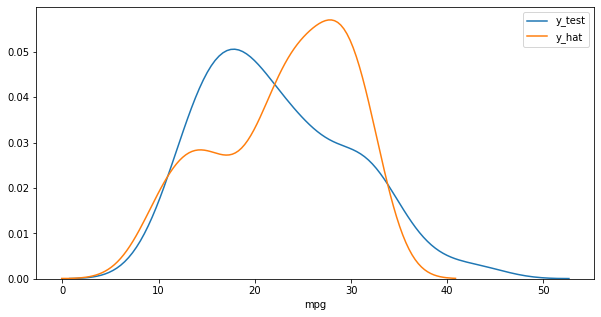

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('./auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model year','origin','name']

df['horsepower'].replace('?',np.nan,inplace=True)
df.dropna(subset=['horsepower'],axis=0,inplace=True)
df['horsepower']=df['horsepower'].astype('float')

ndf=df[['mpg','cylinders','horsepower','weight']]

x=ndf[['cylinders','horsepower','weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=0.3,random_state=10)

print('훈련 데이터: ',x_train.shape)
print('검증 데이터: ',x_test.shape)

from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

r_square=lr.score(x_test,y_test)
print(r_square)
print('\n')

print('x 변수의 개수 a: ',lr.coef_)
print('\n')

print('상수항 b',lr.intercept_)

y_hat=lr.predict(x_test)

plt.figure(figsize=(10,5))
ax1=sns.distplot(y_test,hist=False,label="y_test")
ax2=sns.distplot(y_hat,hist=False,label="y_hat",ax=ax1)
plt.show()
plt.close()

In [34]:
import pandas as pd
import seaborn as sns

df=sns.load_dataset('titanic')

print(df.head())
print('\n')

pd.set_option('display.max_columns',15)
print(df.head())

print(df.info())

rdf=df.drop(['deck','embark_town'],axis=1)
print(rdf.columns.values)

rdf=df.dropna(subset=['age'],how='any',axis=0)
print(len(rdf))

most_freq=rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq,inplace=True)

ndf=rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
print(ndf.head())

onehot_sex=pd.get_dummies(ndf['sex'])
ndf=pd.concat([ndf,onehot_sex],axis=1)

onehot_embarked=pd.get_dummies(ndf['embarked'],prefix='town')
ndf=pd.concat([ndf,onehot_embarked],axis=1)

ndf.drop(['sex','embarked'],axis=1,inplace=True)
print(ndf.head())

x=ndf[['pclass','age','sibsp','parch','female','male',
      'town_C','town_Q','town_S']]
y=ndf['survived']

from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

print('train data 개수:',x_train.shape)
print('test data 개수:',x_test.shape)

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

y_hat=knn.predict(x_test)

print(y_hat[0:10])
print(y_test.values[0:10])

from sklearn import metrics
knn_metrix=metrics.confusion_matrix(y_test,y_hat)
print(knn_metrix)

knn_report=metrics.classification_report(y_test,y_hat)
print(knn_report)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C

C:\Users\60415\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
